In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.metrics import classification_report

In [303]:
test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv')
all_data = pd.concat([train, test])

# Обзорчик

In [304]:
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [305]:
all_data.shape

(12970, 14)

In [306]:
all_data.isnull().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
PassengerId        0
dtype: int64

In [307]:
print(all_data.query("HomePlanet == 'Europa'").Transported.isnull().sum())
print(all_data.query("HomePlanet == 'Europa'").Transported.notnull().sum())

1002
2131


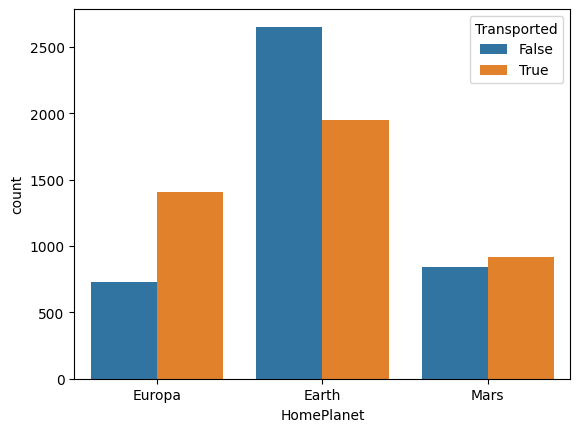

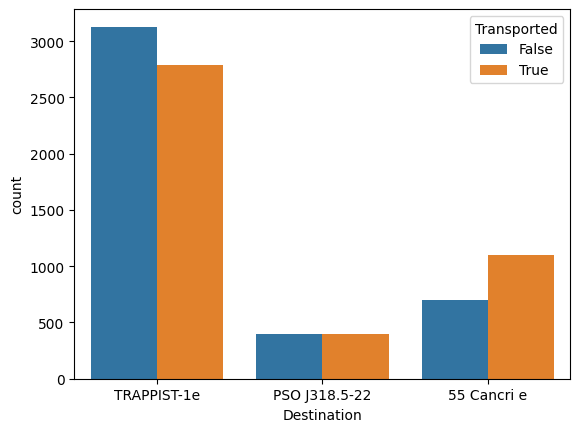

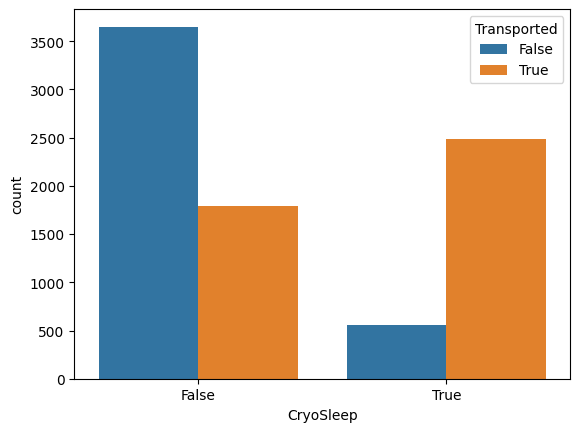

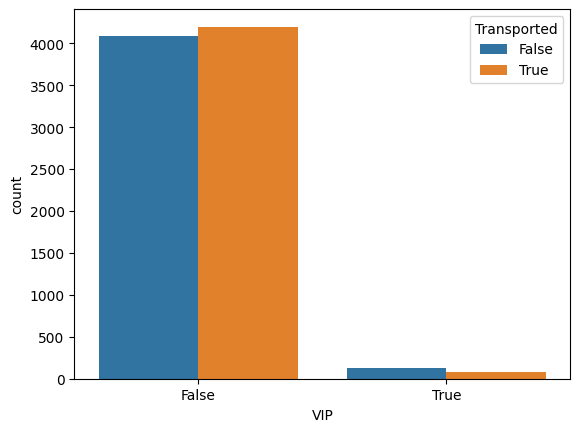

In [308]:
sns.countplot(train, x="HomePlanet", hue="Transported")
plt.show()
sns.countplot(train, x="Destination", hue="Transported")
plt.show()
sns.countplot(train, x="CryoSleep", hue="Transported")
plt.show()
sns.countplot(train, x="VIP", hue="Transported")
plt.show()

In [309]:
len(train.Cabin.unique().tolist())

6561

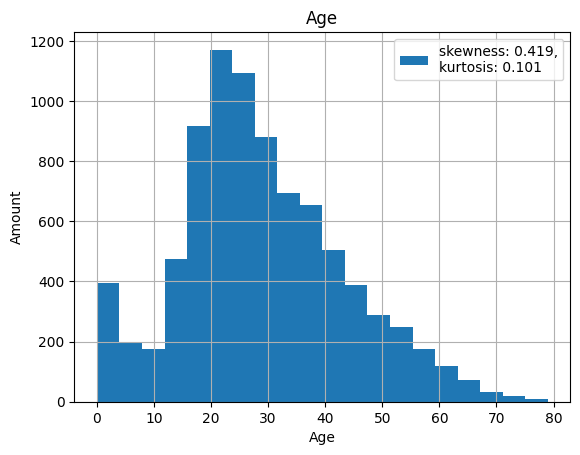

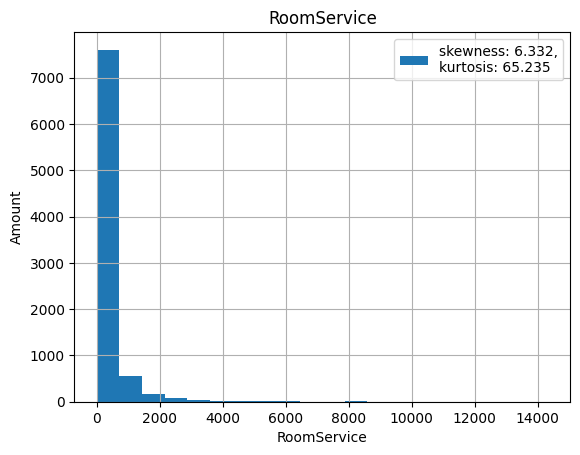

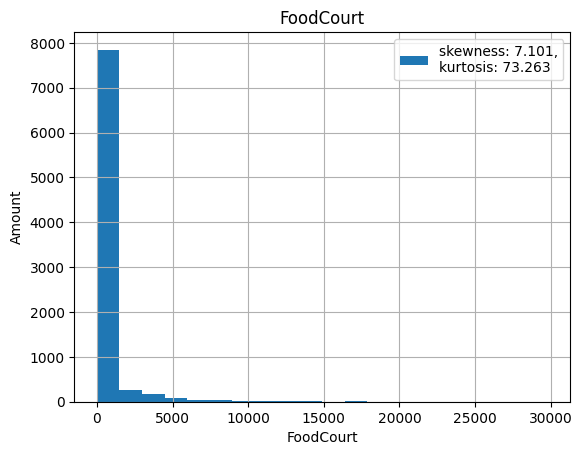

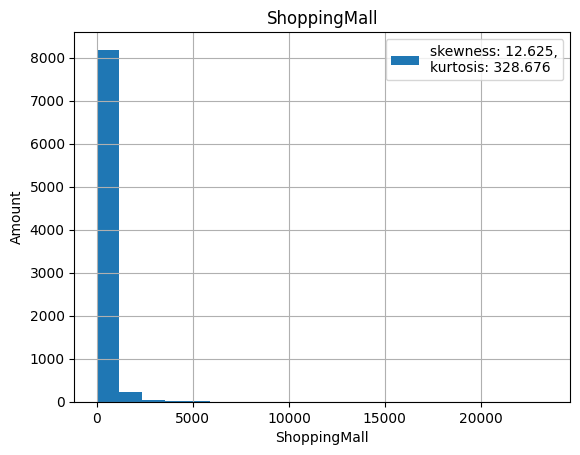

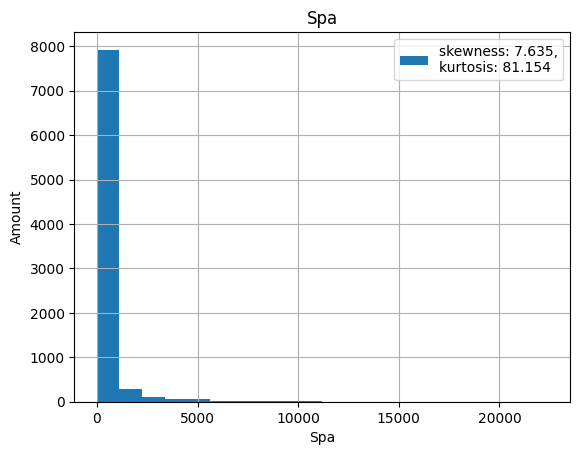

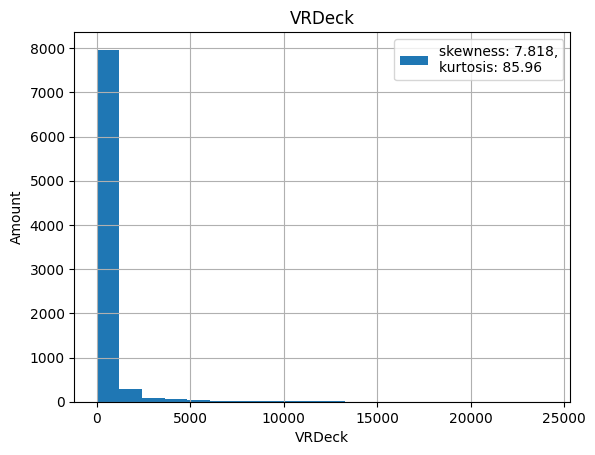

In [310]:
cont_cols = all_data.select_dtypes(exclude=['object']).columns.tolist()
cont_cols
for i in cont_cols:
    train[i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()

# Заполнение пустых

In [311]:
print(train.shape)
all_data = pd.concat([train, test])
cat_cols = all_data.select_dtypes(include=['object']).columns.tolist()[:-1]
cont_cols = all_data.select_dtypes(exclude=['object']).columns.tolist()

all_data['Age'] = all_data['Age'].fillna(train['Age'].mean())
all_data['RoomService'] = all_data['RoomService'].fillna(train['RoomService'].median())
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(train['FoodCourt'].median())
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(train['ShoppingMall'].median())
all_data['Spa'] = all_data['Spa'].fillna(train['Spa'].median())
all_data['VRDeck'] = all_data['VRDeck'].fillna(train['VRDeck'].median())

all_data = all_data.fillna(train[cat_cols].mode().iloc[0])

print(all_data.shape)
print(all_data.isnull().sum().sort_values(ascending=False))

(8693, 14)
(12970, 14)
Transported     4277
PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
dtype: int64


C:\Users\tolya\AppData\Local\Temp\ipykernel_2320\1934229344.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data = all_data.fillna(train[cat_cols].mode().iloc[0])


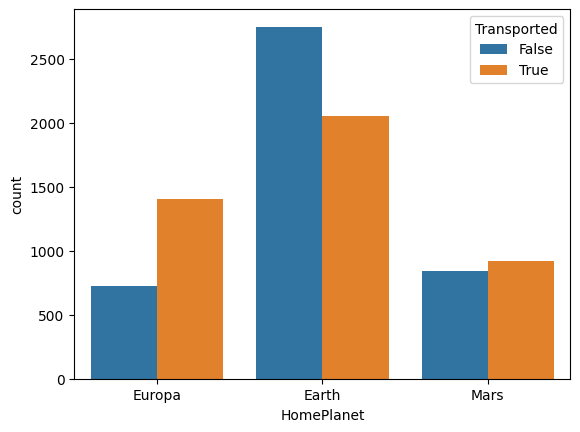

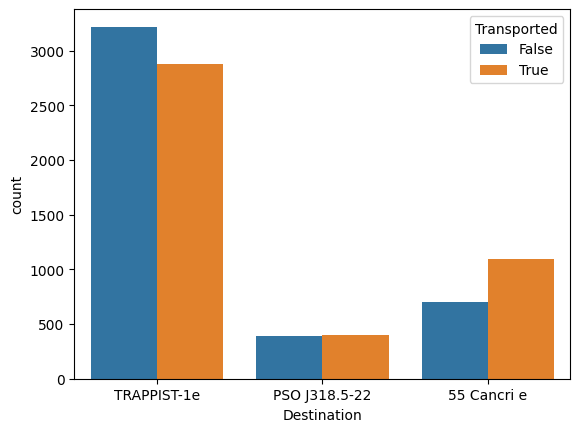

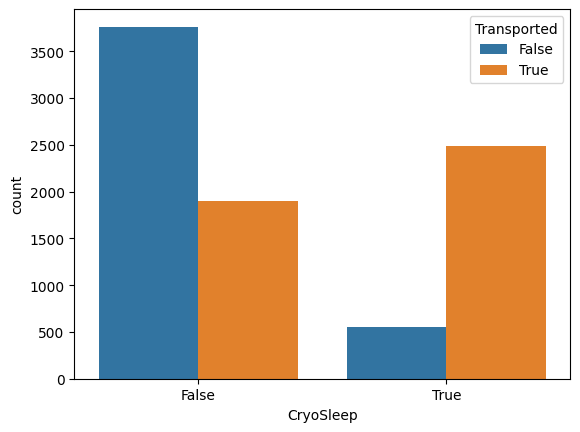

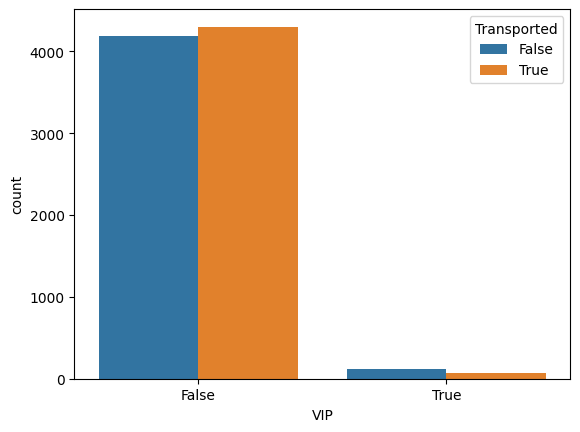

In [312]:
sns.countplot(all_data.iloc[:8693, :], x="HomePlanet", hue="Transported")
plt.show()
sns.countplot(all_data.iloc[:8693, :], x="Destination", hue="Transported")
plt.show()
sns.countplot(all_data.iloc[:8693, :], x="CryoSleep", hue="Transported")
plt.show()
sns.countplot(all_data.iloc[:8693, :], x="VIP", hue="Transported")
plt.show()

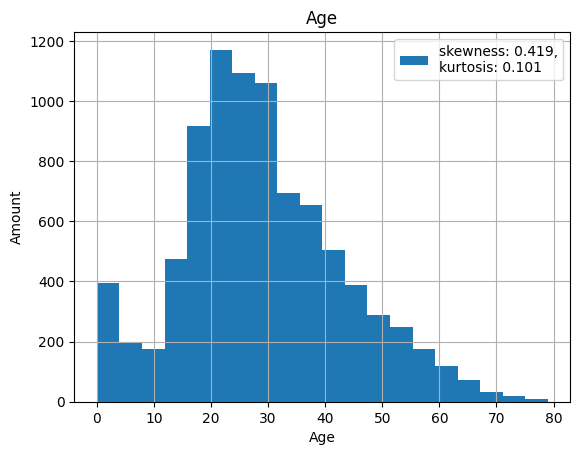

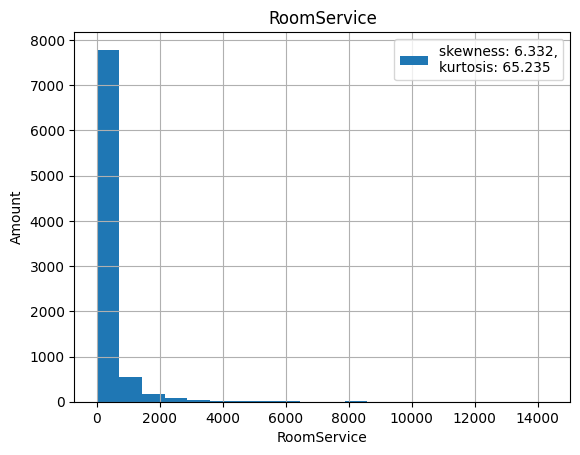

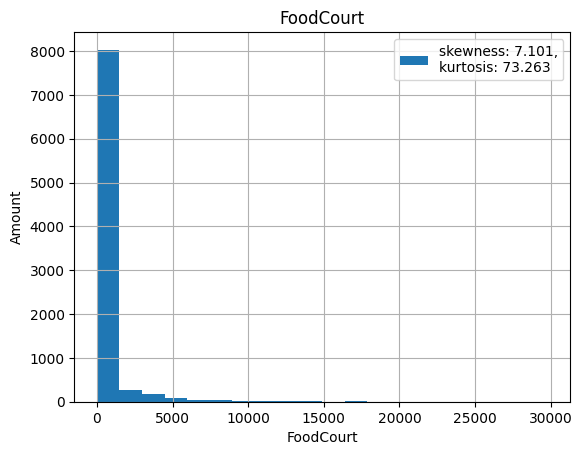

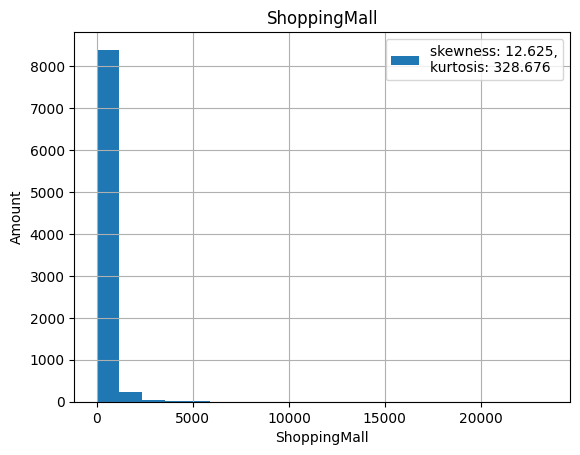

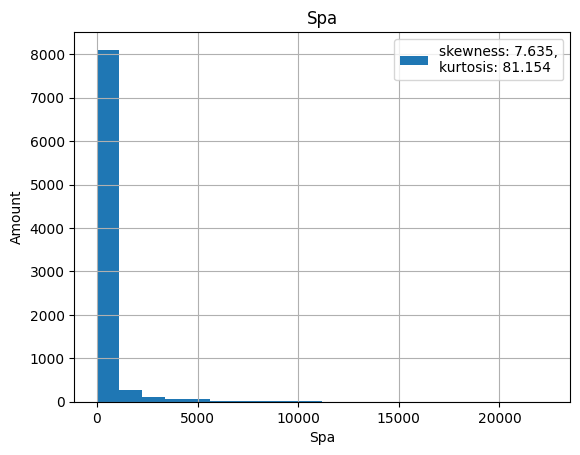

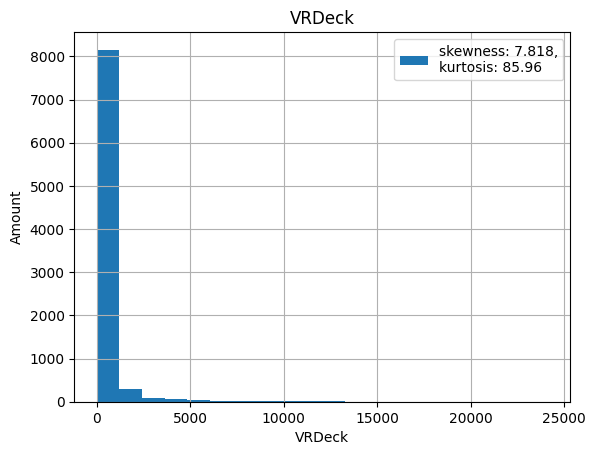

In [313]:
for i in cont_cols:
    all_data.iloc[:8693, :][i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()

In [314]:
# Сколько всего заплатили за допы
all_data['Overall_bill'] = all_data['RoomService'] + all_data['FoodCourt'] + all_data['ShoppingMall'] + all_data['Spa'] + all_data['VRDeck']

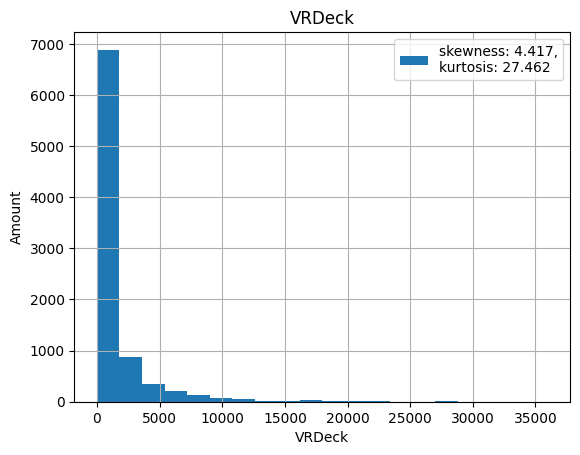

In [315]:
all_data.iloc[:8693, :]['Overall_bill'].hist(bins=20)
plt.title(i)
plt.xlabel(i)
plt.ylabel('Amount')
plt.legend((f'skewness: {round(skew(all_data.iloc[:8693, :]['Overall_bill'], nan_policy='omit'), 3)},\n' +
            f'kurtosis: {round(kurtosis(all_data.iloc[:8693, :]['Overall_bill'], nan_policy='omit'), 3)}', ), 
            loc='upper right'
        )
plt.show()

In [316]:
cont_cols += ['Overall_bill']

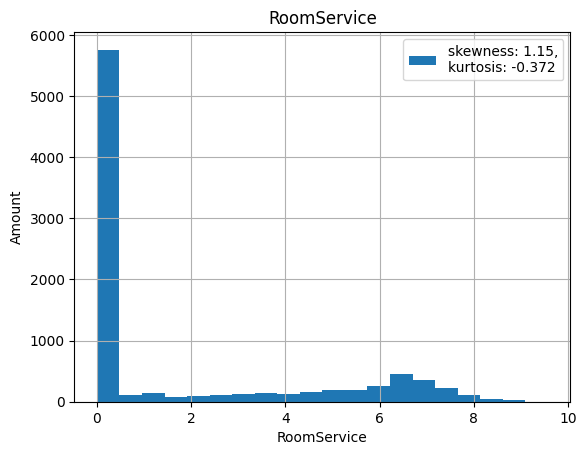

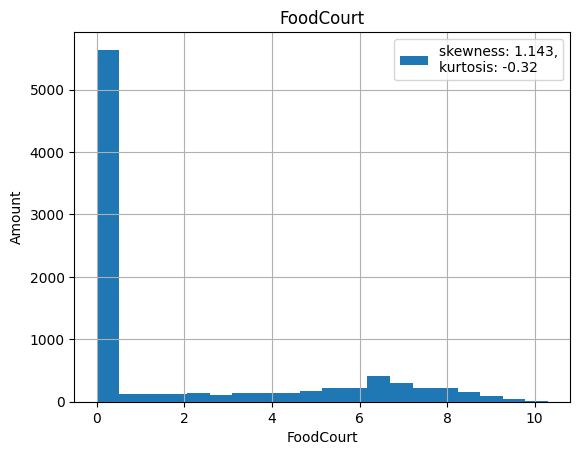

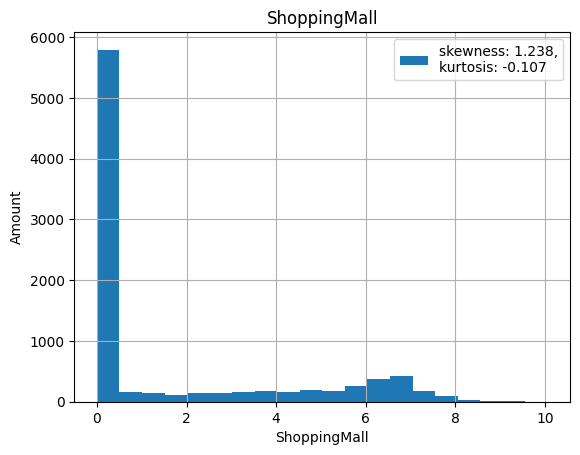

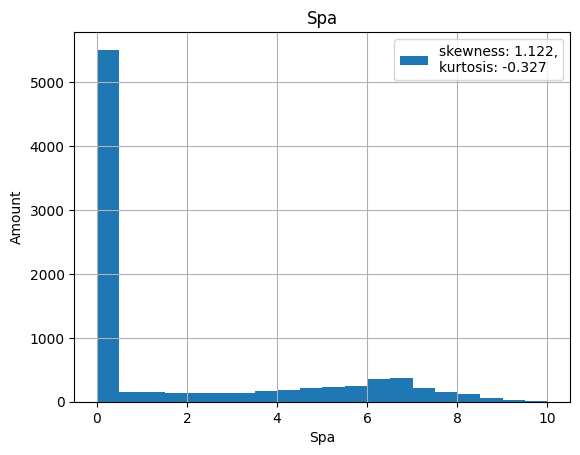

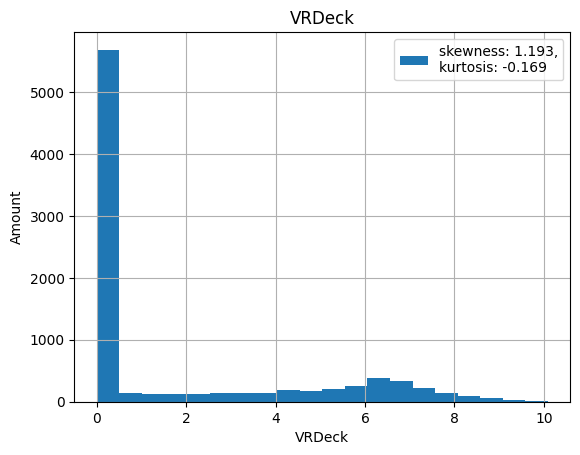

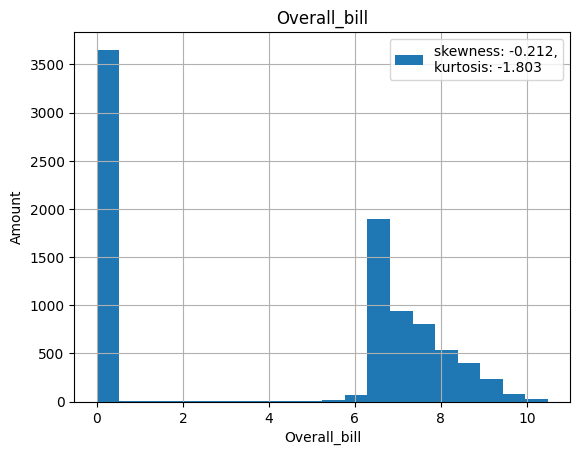

In [317]:
for i in cont_cols[1:]:
    all_data[i] = np.log1p(all_data[i])
    all_data.iloc[:8693, :][i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(all_data.iloc[:8693, :][i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(all_data.iloc[:8693, :][i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()

# Сплит Pasanger_ID, Cabin, Name

In [318]:
# Очевидно должна быть зависимость
# Можно еще аналогично засплитить имена и проверить на пол по словарю + попробывать вывести признак семьи

print(all_data.shape)

all_data[["Group_Id", "Passange_SubID"]] = all_data.PassengerId.str.split('_', expand=True)
all_data[["Deck", "Num", "Side"]] = all_data.Cabin.str.split('/', expand=True)
all_data[["Last_Name", "First_Name"]] = all_data.Name.str.split(' ', expand=True)

all_data.drop(["PassengerId", "Cabin", "Name", "First_Name"], axis=1, inplace=True)

print(all_data.shape)
all_data.head()

(12970, 15)
(12970, 18)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Overall_bill,Group_Id,Passange_SubID,Deck,Num,Side,Last_Name
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,0001,01,B,0,P,Maham
1,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,6.602588,0002,01,F,0,S,Juanna
2,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,9.248021,0003,01,A,0,S,Altark
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,8.551981,0003,02,A,0,S,Solam
4,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,6.995766,0004,01,F,1,S,Willy


In [319]:
train = all_data.iloc[:8693, :]
test = all_data.iloc[8693:, :]
print(train.shape)
test.drop(columns=["Transported"], axis=1, inplace=True)
print(test.shape)

(8693, 18)
(4277, 17)


C:\Users\tolya\AppData\Local\Temp\ipykernel_2320\3083261924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=["Transported"], axis=1, inplace=True)


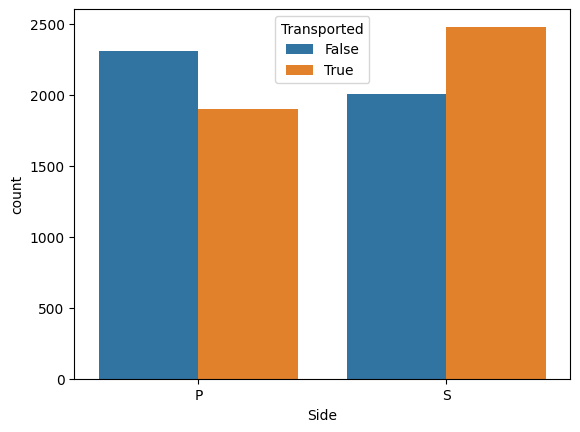

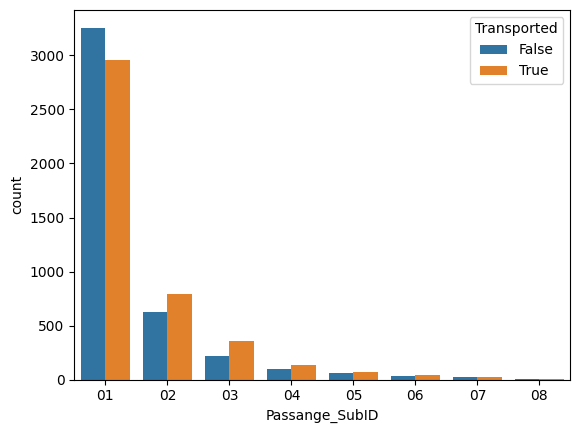

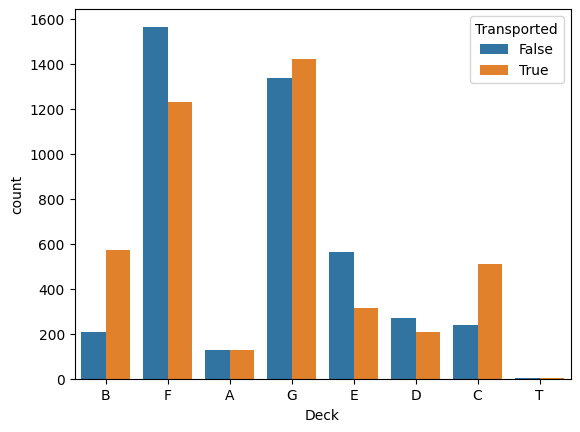

In [320]:
sns.countplot(train, x="Side", hue="Transported")
plt.show()
sns.countplot(train, x="Passange_SubID", hue="Transported")
plt.show()
sns.countplot(train, x="Deck", hue="Transported")
plt.show()

# Кодирование признаков

In [321]:
y = train['Transported'].apply(int)
train.drop(labels=['Transported'], axis=1, inplace=True)
# Слежка за утечкой

all_data = pd.concat([train, test])
cat_cols = all_data.select_dtypes(include=['object']).columns.tolist()

# all_data = pd.get_dummies(all_data, columns=cat_cols, dtype=float)
from category_encoders.binary import BinaryEncoder
BE = BinaryEncoder()
for i in cat_cols:
    enc = BE.fit_transform(all_data[i])

    encoded_colm = pd.DataFrame(enc)
    all_data = pd.concat([all_data, encoded_colm], axis=1)
    all_data = all_data.drop([i], axis=1)

train = all_data.iloc[:8693, :]
test = all_data.iloc[8693:, :]

cols = train.columns
SS = StandardScaler()
train = SS.fit_transform(train)
test = SS.transform(test)

train = pd.DataFrame(train,columns=cols)
test = pd.DataFrame(test,columns=cols)

C:\Users\tolya\AppData\Local\Temp\ipykernel_2320\2483553742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels=['Transported'], axis=1, inplace=True)


In [322]:
print(train.shape)
print(test.shape)

(8693, 60)
(4277, 60)


C:\Users\tolya\AppData\Local\Temp\ipykernel_2320\3812666634.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 2), s=3)


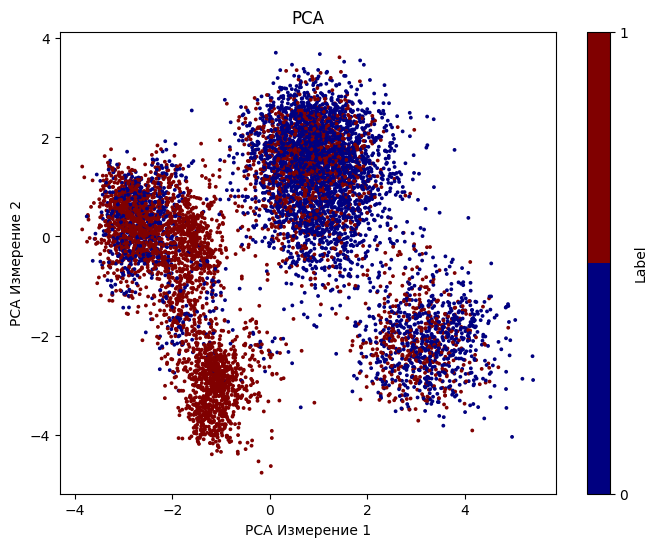

In [323]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

train_reduced = pca.fit_transform(train)
 
plt.figure(figsize=(8, 6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 2), s=3)
plt.colorbar(label='Label', ticks=range(2))
plt.title("PCA")
plt.xlabel("PCA Измерение 1")
plt.ylabel("PCA Измерение 2")
plt.show()

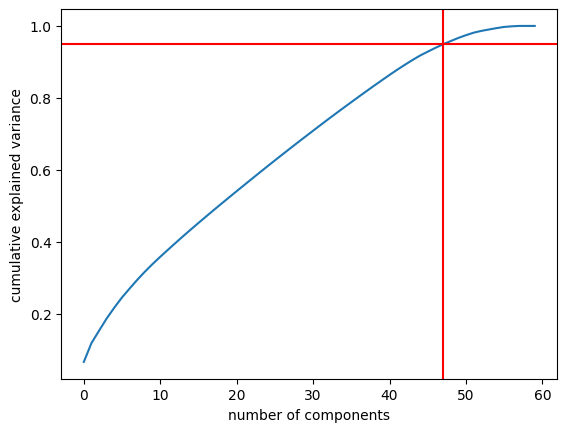

In [324]:
pca = PCA(n_components=60)
train_reduced = pca.fit_transform(train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = 0.95, color = 'r', linestyle = '-') 
plt.axvline(x = 47, color = 'r', linestyle = '-') 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# pca = PCA(n_components=47)
# train = pca.fit_transform(train)
# test = pca.transform(test)

# Овчинка выделки не стоит

# Обучение

In [325]:
X = train.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify=y)

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [326]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.05],
    'max_depth': [3, 4, 5, 10, 15],
    'min_child_weight': [1, 3, 5, 10],
    'subsample': [0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1.0]
}

xgb = XGBClassifier()
 
grid_search = RandomizedSearchCV(xgb, param_grid, cv=5, n_jobs=-1, scoring='roc_auc', n_iter=50)
grid_search.fit(X_train, y_train)
 
xgb_bp = grid_search.best_params_
xgb = grid_search.best_estimator_

xgb.fit(X_train, y_train)

print(classification_report(y_test, xgb.predict(X_test)))

In [327]:
param_grid = {'max_depth': list(np.arange(10, 100, step=10)) + [None],
              'n_estimators': [100, 500, 1000],
              'max_features': ['sqrt', 'log2', 2, None, 5],
              'criterion': ['gini','entropy', 'log_loss'],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 4, 6, 8, 10, 20, 30, 40, 50]
          }

RF = RandomForestClassifier()
 
grid_search = RandomizedSearchCV(RF, param_grid, cv=5, n_jobs=-1, scoring='roc_auc', n_iter=50)
grid_search.fit(X_train, y_train)
 
RF_bp = grid_search.best_params_
RF = grid_search.best_estimator_

RF.fit(X_train, y_train)

print(classification_report(y_test, RF.predict(X_test)))

In [328]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(
    estimators=[('xgb', xgb), ('rf', RF)],
      voting='soft', n_jobs=-1, verbose=True
)

clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

KeyboardInterrupt: 

In [ ]:
# В целом голосование было бессмысленно
# 

In [332]:
pattern = pd.read_csv('sample_submission.csv')
predicts = check_xgb.predict(test.values)
pattern.Transported = predicts
pattern.Transported = pattern.Transported.apply(lambda x: True if x==1 else False)
pattern.to_csv('results.csv', index=False)